# 9.6 Lab: Support Vector Machines
We use the <span style="color:red">**Scikit**</span> library in $Python$ to demonstrate the support vector classifier
and the SVM. 

## 9.6.1 Support Vector Classifier

The <span style="color:red">**Scikit**</span> library contains implementations for a number of statistical
learning methods. In particular, the  <span style="color:red">**svc**</span> function can be used to fit a
support vector classifier when the argument kernel='linear' is used. This
function uses a slightly different formulation from (9.14) and (9.25) for the
support vector classifier. A <span style="color:red">cost</span> argument allows us to specify the cost of
a violation to the margin. When the <span style="color:red">cost</span> argument is small, then the margins
will be wide and many support vectors will be on the margin or will
violate the margin. When the <span style="color:red">cost</span> argument is large, then the margins will
be narrow and there will be few support vectors on the margin or violating
the margin.
We now use the <span style="color:red">**svc**</span> function to fit the support vector classifier for a
given value of the We now use the svm() function to fit the support vector classifier for a
given value of the cost parameter. Here we demonstrate the use of this
function on a two-dimensional example so that we can plot the resulting
decision boundary. We begin by generating the observations, which belong
to two classes, and checking whether the classes are linearly separable. parameter. Here we demonstrate the use of this
function on a two-dimensional example so that we can plot the resulting
decision boundary. We begin by generating the observations, which belong
to two classes, and checking whether the classes are linearly separable.

$$
\max\limits_{\beta_0, \beta_1, \dots, \beta_p} M ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~     (9.9)
$$
$$
subject~to ~ \sum_{j=1}^p \beta_j^2 = 1 , ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ (9.10)
$$
$$
y_i(\beta_0 + \beta_1 x_{i_1} + \beta_2 x_{i_2} + \dots + \beta_p x_{i_p})  \ge M ~~~~~~ \forall i = 1, \dots, n.   (9.11)
$$

Before you call the function, you need to load in all libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

pd.set_option('display.notebook_repr_html', False)
 
# %matplotlib inline
plt.style.use('seaborn-white')


In [4]:
# This function plots a classifier with support vetors. #
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], s = 70, c = y, cmap = plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines. #
    sv = svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c = 'k', marker = '|', s = 100, linewidths = '1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)


We begin by generating the observations, which belong to two classes, and checking whether the classes are linearly separable.

[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


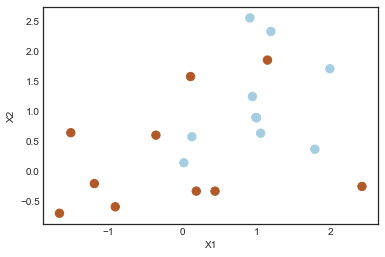

In [5]:
# Generate random data. 20 observations, 2 features, 2 classes. #
np.random.seed(5)
X = np.random.randn(20, 2)
y = np.repeat([1, -1], 10)

print (y)
X[y == -1] = X[y == -1] + 1
plt.scatter(X[:, 0], X[:, 1], s = 70, c = y,  cmap = plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

They are not. Next, we fit the support vector classifier. 

The SVC( ) function can be used to fit a support vector classifier when the argument kernel="linear" is used. A c argument allows us to specify the cost of a violation to the margin. When the cost argument is small, then the mar- gins will be wide and many support vectors will be on the margin or will violate the margin. When the cost argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

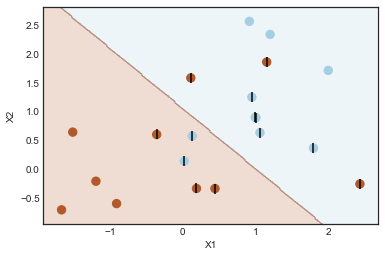

Number of support vectors:  13


In [6]:
# Support Vector Classifier with linear kernel. #
svc = SVC(C = 10, kernel = 'linear')
svc.fit(X, y)

plot_svc(svc, X, y)
# The reason that fitting result here is different from ISLR is that Random data were not identically generated. #

In [7]:
svc # Obtain some basic info about the Support Vectors. #

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
# Smaller cost parameter (C=0.1), more support vectors. #
svc2 = SVC(C = 0.1, kernel = 'linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)
print(len(X))

Number of support vectors:  16
20


Now that a smaller value of the cost parameter is being used, we obtain a larger number of support vectors, because the margin is now wider. 

The following command indicates that we want to compare SVMs with a linear kernel, using a range of values of the cost parameter.http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [9]:
# Select the optimal C parameter by cross-validation. #
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X, y)
#clf.grid_scores_
clf.cv_results_


/Users/dantongyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dantongyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dantongyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dantongyu/an

{'mean_fit_time': array([0.00067291, 0.00060058, 0.00071788, 0.00071487, 0.00039783,
        0.00050516, 0.00090404]),
 'std_fit_time': array([1.66596053e-04, 1.60678982e-04, 1.52997941e-04, 2.30478174e-04,
        5.27767623e-05, 9.35685735e-05, 2.51919141e-04]),
 'mean_score_time': array([0.00052338, 0.00042024, 0.00052719, 0.00096354, 0.00024581,
        0.00033498, 0.00033584]),
 'std_score_time': array([2.59031068e-04, 1.85925871e-04, 2.28203792e-04, 8.90097666e-04,
        3.59843069e-05, 3.01084059e-05, 3.48999849e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5 , 0.5 , 0.5 , 0.  , 0.25, 0.25, 0.25]),
 'split1_test_score': array([0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]),
 'split2_test_score': arra

In [10]:
clf.best_params_


{'C': 0.001}

In [11]:
# Generate test data. #
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1, 1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:, 0], X_test[:, 1], s = 70, c = y_test, cmap = plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()


Now we predict the class labels of these test observations. Here we use the best model obtained through cross-validation in order to make predictions.


In [12]:
# svc2 : C = 0.1 #
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index = svc.classes_, columns = svc.classes_)

# Please write a program to convert this  with column label(1, -1) and row label (1,-1)

    -1   1
-1   2   6
 1   0  12

Now we use a smaller cost and see if there is any difference. (Ussually smaller cost value results in worse classification. However, the data here is not generate as expected so that the result seems not to vary.)

In [13]:
svc3 = SVC(C = 0.001, kernel = 'linear')
svc3.fit(X, y)

# svc3 : C = 0.001 #
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index = svc3.classes_, columns = svc3.classes_)


    -1   1
-1   2   6
 1   0  12

Now consider a situation in which the two classes are linearly separable.
Then we can find a separating hyperplane using the SVC() function. We first further separate the two classes in our simulated data so that they are linearly separable:

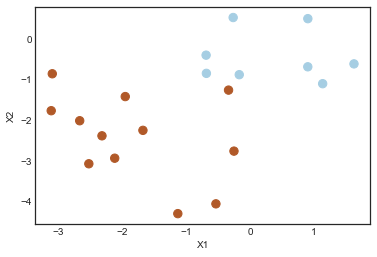

In [14]:
# Change the test data so that the classes are seperable with a hyperplane. #
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:, 0], X_test[:, 1], s = 70, c = y_test, cmap = plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()


We fit the support vector classifier and plot the resulting hyperplane, using a very large value of cost so that no observations are misclassified.

In [15]:
svc4 = SVC(C = 1e5, kernel = 'linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)


Number of support vectors:  3


In [16]:
# Increase the margin. #
svc5 = SVC(C = 1, kernel = 'linear')
svc5.fit(X_test, y_test)
plot_svc(svc5, X_test, y_test)


Number of support vectors:  5


Using cost=1, we misclassify a training observation, but we also obtain a much wider margin and make use of 5 support vectors. It seems likely that this model will perform better on test data than the model with cost=1e5.

## 9.6.2 Support Vector Machine

We first generate some data with a non-linear class boundary and split them into training and testing sets randomly. 

In [17]:
# Generate test data. #
np.random.seed(8)
X = np.random.randn(200, 2)
X[:100] = X[:100] + 2
X[101:150] = X[101:150] - 2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 2)


/Users/dantongyu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


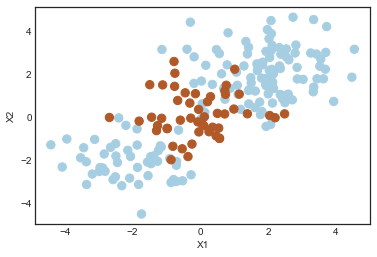

In [18]:
plt.scatter(X[:, 0], X[:, 1], s = 70, c = y, cmap = plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()


In order to fit an SVM using a non-linear kernel, we once again use the svm() function. However, now we use a different value of the parameter kernel.

To fit an SVM with a polynomial kernel we use kernel="poly", and to fit an SVM with a radial kernel we use kernel="rbf". In the former case we also use the degree argument to specify a degree for the polynomial kernel (this is d in (9.22)), and in the latter case we use gamma to specify a value of γ for the radial basis kernel (9.24).

In [19]:
svm = SVC(C = 1.0, kernel = 'rbf', gamma = 1) # Radial kernel with Gamma = 1. #
svm.fit(X_train, y_train)
plot_svc(svm, X_train, y_train)


Number of support vectors:  51


We can see from the figure that there are a fair number of training errors in this SVM fit. If we increase the value of cost, we can reduce the number of training errors. However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

In [20]:
# Increase C value to get more flexibility. #
svm2 = SVC(C = 100, kernel = 'rbf', gamma = 1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_train, y_train)


Number of support vectors:  36


We can perform cross-validation using GridSearchCV() to select the best choice of γ and cost for an SVM with a radial kernel:

In [21]:
# Set parameters by cross-validation. #
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel = 'rbf'), tuned_parameters, cv = 10, scoring = 'accuracy')
clf.fit(X_train, y_train)
clf.cv_results_


/Users/dantongyu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/dantongyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dantongyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dantongyu/anaconda3/lib/p

{'mean_fit_time': array([0.00054128, 0.00076931, 0.00110989, 0.00076749, 0.00065677,
        0.00050931, 0.00073674, 0.00098259, 0.00117564, 0.00088382,
        0.00062985, 0.0005414 , 0.00051172, 0.0010391 , 0.00071633,
        0.00062392, 0.00113678, 0.00158434, 0.0012321 , 0.00075605,
        0.00048652, 0.00056107, 0.00071642, 0.00078337, 0.00069437]),
 'std_fit_time': array([1.45490083e-04, 2.16134511e-04, 8.29358757e-04, 1.91921490e-04,
        1.47604095e-04, 1.20918833e-04, 2.50997302e-04, 3.54794613e-04,
        5.54563327e-04, 2.59579437e-04, 1.75085741e-04, 1.67664238e-04,
        6.25839506e-05, 3.91914503e-04, 1.40303905e-04, 1.01772424e-04,
        5.66846527e-04, 1.26238090e-03, 1.23910564e-03, 1.71473766e-04,
        9.10850840e-05, 9.71257158e-05, 2.47202529e-04, 1.89071527e-04,
        2.03193630e-04]),
 'mean_score_time': array([0.00048141, 0.00053465, 0.0005105 , 0.00043583, 0.00034399,
        0.00031979, 0.00044498, 0.00047266, 0.00044036, 0.00036979,
        0.00

In [22]:
clf.best_params_


{'C': 1, 'gamma': 0.5}

In [23]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))


array([[67,  6],
       [ 9, 18]])

In [24]:
clf.best_estimator_.score(X_test, y_test)


0.85

## 9.6.3 ROC Curves

SVMs and support vector classifiers output class labels for each observa- tion. However, it is also possible to obtain fitted values for each observation, which are the numerical scores used to obtain the class labels. For instance, in the case of a support vector classifier, the fitted value for an observation $X = (X_1,X_2,...,X_p)^T$ takes the form $\hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + ... + \hat{\beta}_p X_p$. For an SVM with a non-linear kernel, the equation that yields the fitted value is given in (9.23). In essence, the sign of the fitted value determines on which side of the decision boundary the observation lies. Therefore, the relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero then it is assigned to the other. 

In [25]:
svm3 = SVC(C = 1, kernel = 'rbf', gamma = 2)
svm3.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVM appears to be producing accurate predictions. By increasing γ we can produce a more flexible fit and generate further improvements in accuracy.

In [26]:
# More flexible model. #
svm4 = SVC(C = 1, kernel = 'rbf', gamma = 50)
svm4.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

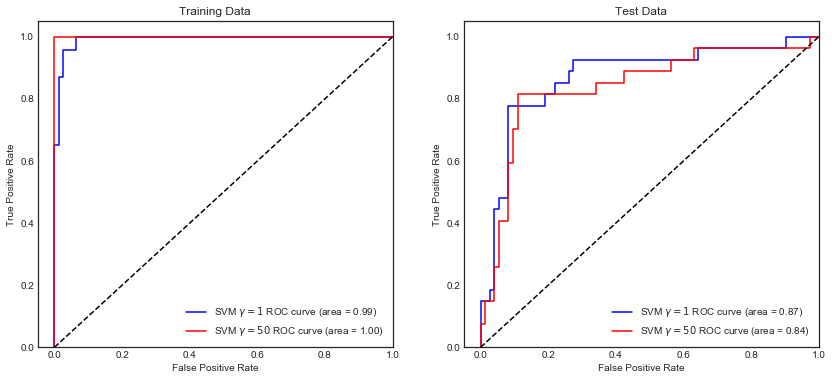

In [27]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label = 'SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color = 'b')
ax1.plot(false_pos_rate4, true_pos_rate4, label = 'SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color = 'r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color = 'b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color = 'r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc = "lower right")

plt.show()


## 9.6.4 SVM with Multiple Classes

If the response is a factor containing more than two levels, then the SVC() function will perform multi-class classification using the one-versus-one ap- proach. We explore that setting here by generating a third class of obser- vations.

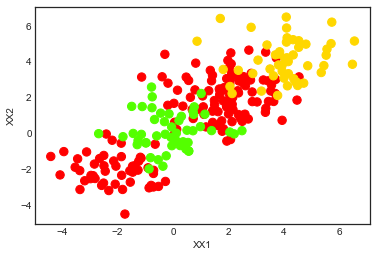

In [28]:
# 3 classes. #
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50, 2)])
yy = np.hstack([y, np.repeat(0, 50)])
XX[yy == 0] = XX[yy == 0] + 4

plt.scatter(XX[:, 0], XX[:, 1], s = 70, c = yy, cmap = plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')

plt.show()


/Users/dantongyu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


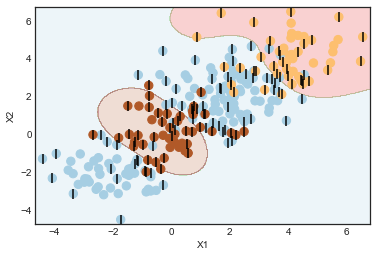

Number of support vectors:  133


In [29]:
svm5 = SVC(C = 1, kernel = 'rbf')
svm5.fit(XX, yy)
plot_svc(svm5, XX, yy)


## 9.6.5 Application to Gene Expression Data

We now examine the Khan data set, which consists of a number of tissue samples corresponding to four distinct types of small round blue cell tu- mors. For each tissue sample, gene expression measurements are available. The data set consists of training data, xtrain and ytrain, and testing data, xtest and ytest.

In [32]:
X_train = pd.read_csv('./Khan_xtrain.csv').drop('Unnamed: 0', axis = 1)
#y_train = pd.read_csv('Khan_ytrain.csv').drop('Unnamed: 0', axis = 1).as_matrix().ravel()
y_train = pd.read_csv('./Khan_ytrain.csv').drop('Unnamed: 0', axis = 1).values.ravel()
print(y_train)
X_test = pd.read_csv('./Khan_xtest.csv').drop('Unnamed: 0', axis = 1)
#y_test = pd.read_csv('Khan_ytest.csv').drop('Unnamed: 0', axis = 1).as_matrix().ravel()
y_test = pd.read_csv('./Khan_ytest.csv').drop('Unnamed: 0', axis = 1).values.ravel()

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1]


In [33]:
pd.Series(y_train).value_counts(sort = False)


1     8
2    23
3    12
4    20
dtype: int64

In [34]:
pd.Series(y_test).value_counts(sort = False)


1    3
2    6
3    6
4    5
dtype: int64

We will use a support vector approach to predict cancer subtype using gene expression measurements. In this data set, there are a very large number of features relative to the number of observations. This suggests that we should use a linear kernel, because the additional flexibility that will result from using a polynomial or radial kernel is unnecessary.

In [35]:
svc = SVC(C = 10, kernel = 'linear')
svc.fit(X_train, y_train)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index = svc.classes_, columns = svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)


True       1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20


We see that there are no training errors. In fact, this is not surprising, because the large number of variables relative to the number of observations implies that it is easy to find hyperplanes that fully separate the classes. We are most interested not in the support vector classifier’s performance on the training observations, but rather its performance on the test observations.

In [37]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index = svc.classes_, columns = svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)


True       1  2  3  4
Predicted            
1          3  0  0  0
2          0  6  2  0
3          0  0  4  0
4          0  0  0  5


We see that using cost=10 yields two test set errors on this data.
